# Face detection using Cognitive Services
To illustrate how cognitive services can be used for detecting faces in an image and identifying various attributes such as the number of people, their gender and age, consider the following sample image from http://www.how-old.net:
<img src="https://how-old.net/Images/faces2/main007.jpg" width=200 height=200>

You can run this example as a Jupyter notebook on [MyBinder](https://mybinder.org) by clicking on the launch Binder badge: 

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=FaceAPI.ipynb)

Please refer to the [API definitions](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236) for technical documentation for the APIs.

## Prerequisites

You must have a [Cognitive Services API account](https://docs.microsoft.com/azure/cognitive-services/cognitive-services-apis-create-account) with **Face APIs**. The [free trial](https://azure.microsoft.com/en-us/try/cognitive-services/?api=face-api) is sufficient for this quickstart. You need the access key provided when you activate your free trial, or you may use a paid subscription key from your Azure dashboard.

To continue with this walkthrough, please replace `subscription_key` below with a valid subscription key that you obtained earlier.

In [1]:
subscription_key = None
assert subscription_key

Next, please verify the URL below and make sure it corresponds to the region you used when generating the API key. If you used a trial subscription, you are good to go!

In [2]:
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

Here is the URL of the image above. You can experiment with different images simply by changing ``image_url`` to point to a different image and re-running this notebook.

In [3]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

We next call into the Face API to recognize the faces in the image. In this instance, the image is specified via a publically-visible URL. You can also pass an image directly as part of the request body. For more details, please refer to the [API documentation](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236). 

In [4]:
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

Finally, we use the Matplotlib library in Python to plot the image and annotate it with face information found using the Face APIs.

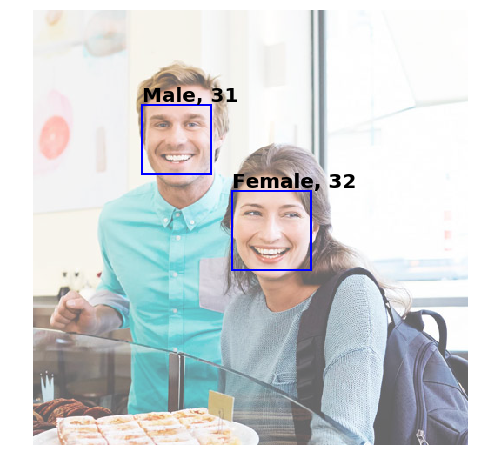

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

For more information on the Microsoft Cognitive Face APIs, see [here](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236) for the full documentation of the REST APIs.

Here are more images that can be analyzed using the same technique.
First, we define a helper function, ``annotate_image`` to annotate an image given its URL.
We can then call ``annotate_image`` on other images as desired.

In [6]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main001.jpg")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main002.jpg")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main004.jpg")